In [14]:
import logging
import random
import os
import collections
import pandas as pd
from IPython.display import display
from pandas.io.formats.style import Styler
import networkx as nx
import re
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import defaultdict
from pybatfish.client.commands import *
# noinspection PyUnresolvedReferences
from pybatfish.datamodel import Interface, Edge
from pybatfish.datamodel.flow import HeaderConstraints, PathConstraints
from pybatfish.question import bfq, load_questions  # noqa: F401
from pybatfish.util import get_html
import json
#bf_logger.setLevel(logging.WARN)

load_questions()

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
# Prevent rendering text between '$' as MathJax expressions
pd.set_option('display.html.use_mathjax', False)

# UUID for CSS styles used by pandas styler.
# Keeps our notebook HTML deterministic when displaying dataframes
_STYLE_UUID = "pybfstyle"


class MyStyler(Styler):
    """A custom styler for displaying DataFrames in HTML"""

    def __repr__(self):
        return repr(self.data)


def show(df):
    """
    Displays a dataframe as HTML table.

    Replaces newlines and double-spaces in the input with HTML markup, and
    left-aligns the text.
    """

    # workaround for Pandas bug in Python 2.7 for empty frames
    if not isinstance(df, pd.DataFrame) or df.size == 0:
        display(df)
        return
    df = df.replace('\n', '<br>', regex=True).replace('  ', '&nbsp;&nbsp;',
                                                      regex=True)
    display(MyStyler(df).set_uuid(_STYLE_UUID).format(get_html)
            .set_properties(**{'text-align': 'left', 'vertical-align': 'top'}))


Successfully loaded 63 questions from remote


In [2]:
plt.rcParams['figure.figsize'] = 15,10
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["legend.fontsize"] = 10

In [3]:
#Plotting the number of network properties for each network
directories = [x[1] for x in os.walk(os.getcwd())][0]
named_structures = set()
main_d = defaultdict(dict)
for directory in directories:
    curr_d = defaultdict(int)
    NETWORK_NAME = directory
    SNAPSHOT_NAME = "example_snapshot"

    SNAPSHOT_PATH = directory

    # Now create the network and initialize the snapshot
    try:
        bf_set_network(NETWORK_NAME)
        bf_init_snapshot(SNAPSHOT_PATH, name=SNAPSHOT_NAME, overwrite=True)
    except:
        print(directory + " not loaded")
        continue
    load_questions()
    data = bfq.namedStructures().answer().frame()
    Structure_types = list(data.Structure_Type.unique())
    named_structures.update(Structure_types)
    for struct in Structure_types:
    
        df = data[data['Structure_Type']==struct]
        curr_d[struct] = df.size
    main_d[directory] = dict(curr_d)


for network in main_d:
    c = main_d[network]
    for struct in named_structures:
        if struct not in c:
            c[struct] = 0
            
df = pd.DataFrame(main_d).T
df['Total'] = df.sum(axis = 1)
df = df.drop(df[df.Total < 1].index)
df1 = df[df["Total"]>5000]
df2 = df[(df["Total"]<5000) & (df['Total']>1000)]
df3 = df[df["Total"]<1000]
del df1['Total']
del df2['Total']
del df3['Total']

status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:43:33.807000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:43:33.807000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 16 / 16.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:43:33.807000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 16 / 16.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: CHECKINGSTATUS
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:43:34.352000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by running:

    bf_upload_diagnostics(dry_run=False

SWITCH-Configs2 not loaded


status: TRYINGTOASSIGN
.... no task information
status: CHECKINGSTATUS
.... 2019-10-03 17:43:37.948000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Parse network configs 107 / 1125.
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Parse network configs 457 / 1125.
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Parse network configs 884 / 1125.
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Parse network configs 1107 / 1125. (00:00:05 elapsed)
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Serializing 'org.batfish.representation.cisco.CiscoConfiguration' instances to disk 554 / 1093. (00:00:06 elapsed)
status: ASSIGNED
.... 2019-10-03 17:43:37.948000-04:00 Reading, unpack

.ipynb_checkpoints not loaded
configs not loaded


status: ASSIGNED
.... 2019-10-03 17:43:59.725000-04:00 Reading, unpacking, and deserializing files containing 'org.batfish.datamodel.GenericConfigObject' instances 5 / 20.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:43:59.725000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 22 / 22.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:00.224000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by running:

    bf_upload_diagnostics(dry_run=False, contact_info='<optional email address>')

to share private, anonymized information. For more information, see the documentation wit

Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:14.631000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:14.631000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:15.045000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:44:15.045000-04:00 Parse network configs 11 / 14.
status: ASSIGNED
.... 2019-10-03 17:44:15.045000-04:00 Convert configurations to vendor-independent format 14 / 14.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:15.045000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 14 / 14.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:15.907000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:15.907000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish fai

confs_rhythmone not loaded


status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:25.965000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:44:25.965000-04:00 Begin job.
status: CHECKINGSTATUS
.... 2019-10-03 17:44:25.965000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:44:25.965000-04:00 Parse network configs 71 / 216.
status: ASSIGNED
.... 2019-10-03 17:44:25.965000-04:00 Parse network configs 193 / 216.
status: ASSIGNED
.... 2019-10-03 17:44:25.965000-04:00 Convert configurations to vendor-independent format 10 / 216.
status: ASSIGNED
.... 2019-10-03 17:44:25.965000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 216 / 216.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:25.965000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 216 / 216.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:30.109000-04:00 Begin

Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:42.295000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:44:42.295000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:44:42.295000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:42.295000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:43.828000-04:00 Begin job.


ytz2 not loaded


status: ASSIGNED
.... 2019-10-03 17:44:43.828000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 14 / 14.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:43.828000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 14 / 14.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:44.367000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by running:

    bf_upload_diagnostics(dry_run=False, contact_info='<optional email address>')

to share private, anonymized information. For more information, see the documentation with:

    help(bf_upload_diagno

rhythmone-aws-configuration-2016-02-16_13-03-56 not loaded


status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:46.681000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:44:46.681000-04:00 Parse network configs 22 / 51.
status: ASSIGNED
.... 2019-10-03 17:44:46.681000-04:00 Serializing 51 vendor-independent configuration structures for snapshot 5b8f9fbf-a742-4f59-941c-090d8a23e446 51 / 51.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:46.681000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 51 / 51.
Default snapshot is now set to example_snapshot
status: ASSIGNED
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:47.586000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:44:47.586000-04:00 Begin job.
Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:44:47.971000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:44:47.971000-04:00 Begin job.
status: TERMINATE

switch-configs not loaded


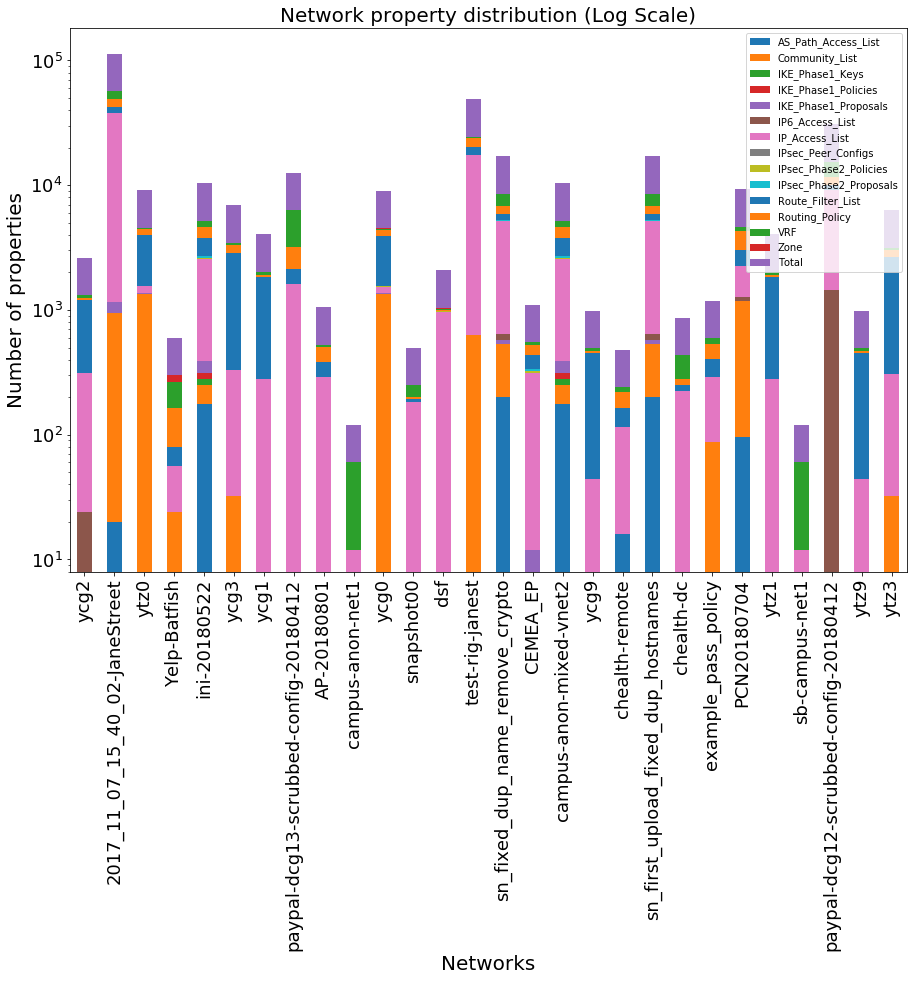

In [4]:
df.plot(kind = "bar", stacked = True,figsize=(15,10))
plt.xlabel("Networks")
plt.yscale("log")
plt.ylabel("Number of properties")
plt.title("Network property distribution (Log Scale)")
plt.savefig("network_property_distribution_log.png")
plt.show()

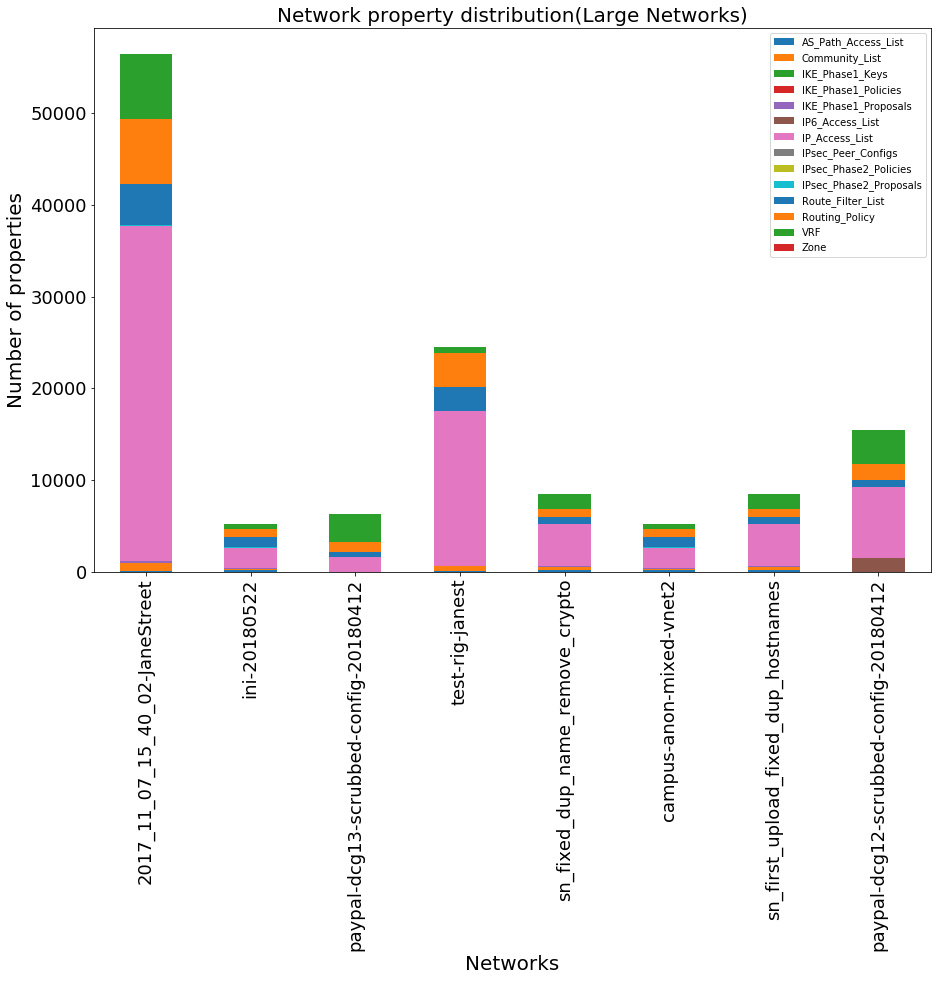

In [5]:
df1.plot(kind = "bar", stacked = True,figsize=(15,10))
plt.xlabel("Networks")
plt.ylabel("Number of properties")
plt.title("Network property distribution(Large Networks)")
plt.savefig("network_property_distribution0.png")
plt.show()

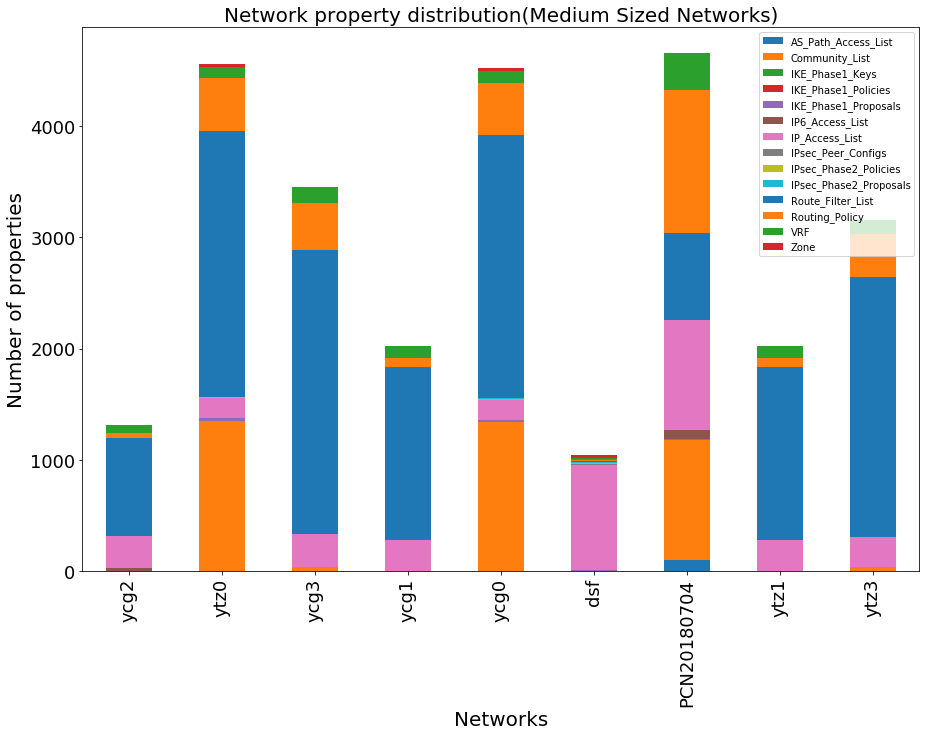

In [6]:
df2.plot(kind = "bar", stacked = True,figsize=(15,10))
plt.xlabel("Networks")
plt.ylabel("Number of properties")
plt.title("Network property distribution(Medium Sized Networks)")
plt.savefig("network_property_distribution1.png")
plt.show()

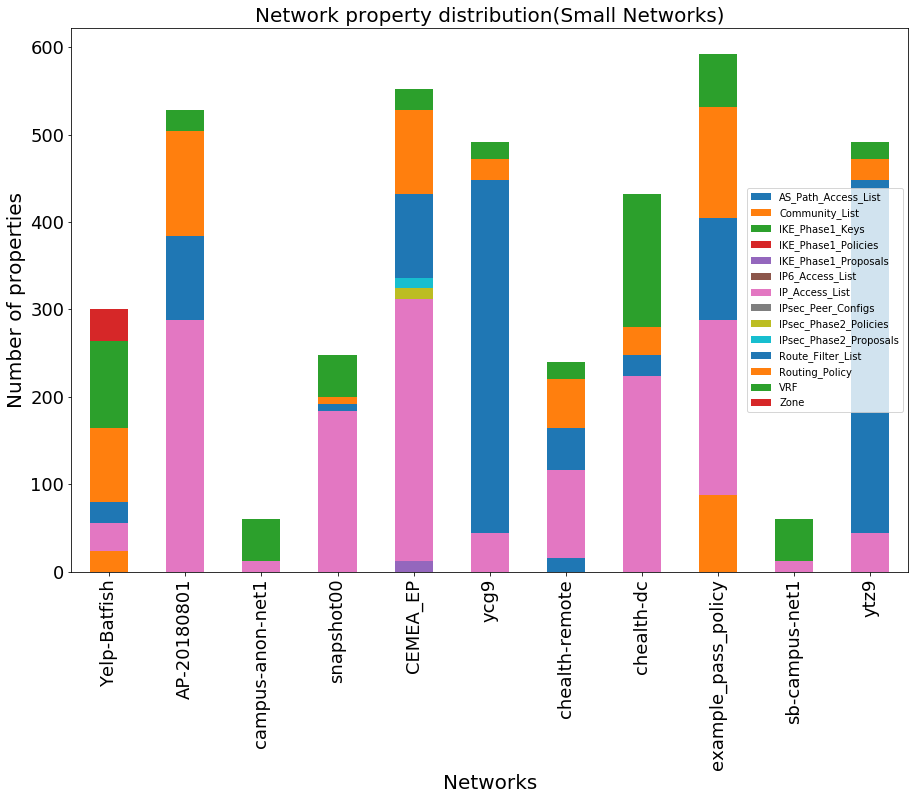

In [7]:
df3.plot(kind = "bar", stacked = True,figsize=(15,10))
plt.xlabel("Networks")
plt.ylabel("Number of properties")
plt.title("Network property distribution(Small Networks)")
plt.savefig("network_property_distribution2.png")
plt.show()

In [8]:
#Plotting the number of nodes in each network
directories = [x[1] for x in os.walk(os.getcwd())][0]
num_nodes = defaultdict(int)
for directory in directories:
    NETWORK_NAME = directory
    SNAPSHOT_NAME = "example_snapshot"

    SNAPSHOT_PATH = directory

    # Now create the network and initialize the snapshot
    try:
        bf_set_network(NETWORK_NAME)
        bf_init_snapshot(SNAPSHOT_PATH, name=SNAPSHOT_NAME, overwrite=True)
    except:
        print(directory + " not loaded")
        continue
    load_questions()
    data = bfq.namedStructures().answer().frame()
    num_nodes[directory] = len(data.Node.unique())

status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:45:04.801000-04:00 Parse network configs 1 / 17.
status: ASSIGNED
.... 2019-10-03 17:45:04.801000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 16 / 16.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:45:04.801000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 16 / 16.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: CHECKINGSTATUS
.... 2019-10-03 17:45:05.347000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:45:05.347000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by runnin

SWITCH-Configs2 not loaded


status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:45:08.238000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:45:08.238000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:45:08.238000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:45:08.238000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:45:08.238000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:45:08.238000-04:00 Parse network configs 176 / 1125.
status: ASSIGNED
.... 2019-10-03 17:45:08.238000-04:00 Parse network configs 565 / 1125.
status: CHECKINGSTATUS
.... 2019-10-03 17:45:08.238000-04:00 Parse network configs 906 / 1125.
status: ASSIGNED
.... 2019-10-03 17:45:08.238000-04:00 Parse network configs 1123 / 1125. (00:00:05 elapsed)
status: CHECKINGSTATUS
.... 2019-10-03 17:45:08.238000-04:00 Serializing 'org.batfish.representation.cisco.CiscoConfiguration' instances to disk 979 / 1093. (00:00:06 elapsed)
status: ASSIGNED
.... 2019-10-03 17:45:08.238000-04:00 Convert c

.ipynb_checkpoints not loaded
configs not loaded


status: ASSIGNED
.... 2019-10-03 17:45:30.032000-04:00 Serializing 'org.batfish.representation.juniper.JuniperConfiguration' instances to disk 20 / 20.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:45:30.032000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 22 / 22.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:45:30.574000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by running:

    bf_upload_diagnostics(dry_run=False, contact_info='<optional email address>')

to share private, anonymized information. For more information, see the documentation with:

    help(bf_uplo

Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by running:

    bf_upload_diagnostics(dry_run=False, contact_info='<optional email address>')

to share private, anonymized information. For more information, see the documentation with:

    help(bf_upload_diagnostics)
Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: CHECKINGSTATUS
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:45:45.551000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:45:45.979000-04:00 Parse network configs 0 / 14.
status: ASSIGNED
.... 2019-10-03 17:45:45.979000-04:00 Parse network configs 9 / 14.
status: ASSIGNED
.... 2019

confs_rhythmone not loaded


status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:45:57.398000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:45:57.398000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:45:57.398000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:45:57.398000-04:00 Parse network configs 84 / 216.
status: ASSIGNED
.... 2019-10-03 17:45:57.398000-04:00 Parse network configs 177 / 216.
status: ASSIGNED
.... 2019-10-03 17:45:57.398000-04:00 Convert configurations to vendor-independent format 37 / 216.
status: ASSIGNED
.... 2019-10-03 17:45:57.398000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 216 / 216.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:45:57.398000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 216 / 216.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:46:01.558000-04:00 Begin job.


Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:46:13.232000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:46:13.232000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:46:13.232000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:46:13.232000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:46:14.595000-04:00 Parse network configs 3 / 14.


ytz2 not loaded


status: TERMINATEDNORMALLY
.... 2019-10-03 17:46:14.595000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 14 / 14.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:46:14.868000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by running:

    bf_upload_diagnostics(dry_run=False, contact_info='<optional email address>')

to share private, anonymized information. For more information, see the documentation with:

    help(bf_upload_diagnostics)
Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 

rhythmone-aws-configuration-2016-02-16_13-03-56 not loaded


status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:46:17.193000-04:00 Begin job.
status: CHECKINGSTATUS
.... 2019-10-03 17:46:17.193000-04:00 Parse network configs 19 / 51.
status: ASSIGNED
.... 2019-10-03 17:46:17.193000-04:00 Serializing 51 vendor-independent configuration structures for snapshot 2a103d7d-f439-428f-9af4-07304e01b8da 50 / 51.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:46:17.193000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 51 / 51.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:46:18.093000-04:00 Begin job.
Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:46:18.305000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:46:18.305000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:46:18.305000-04:00 Begin 

switch-configs not loaded


In [9]:
df = pd.DataFrame(num_nodes.items())
df.columns = ["Network","Nodes"]


In [10]:
df = df.drop(df[df.Nodes < 1].index)
df1 = df[(df['Nodes']>80) & (df['Nodes']<300)]
df2 = df[df['Nodes']<80]
df11 = df[df['Nodes']>80]


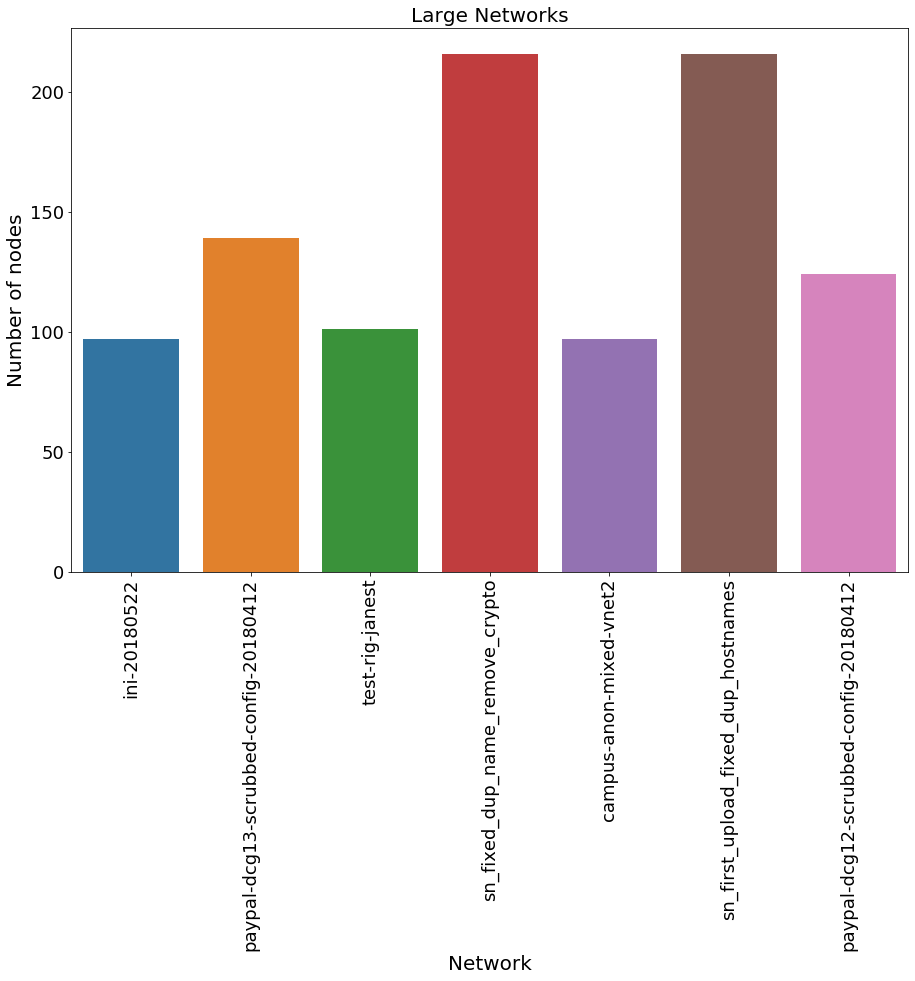

In [11]:
ax = sns.barplot(x="Network", y="Nodes", data=df1)
ax.set_ylabel("Number of nodes")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Large Networks")
plt.savefig("Num_of_nodes_large.png")

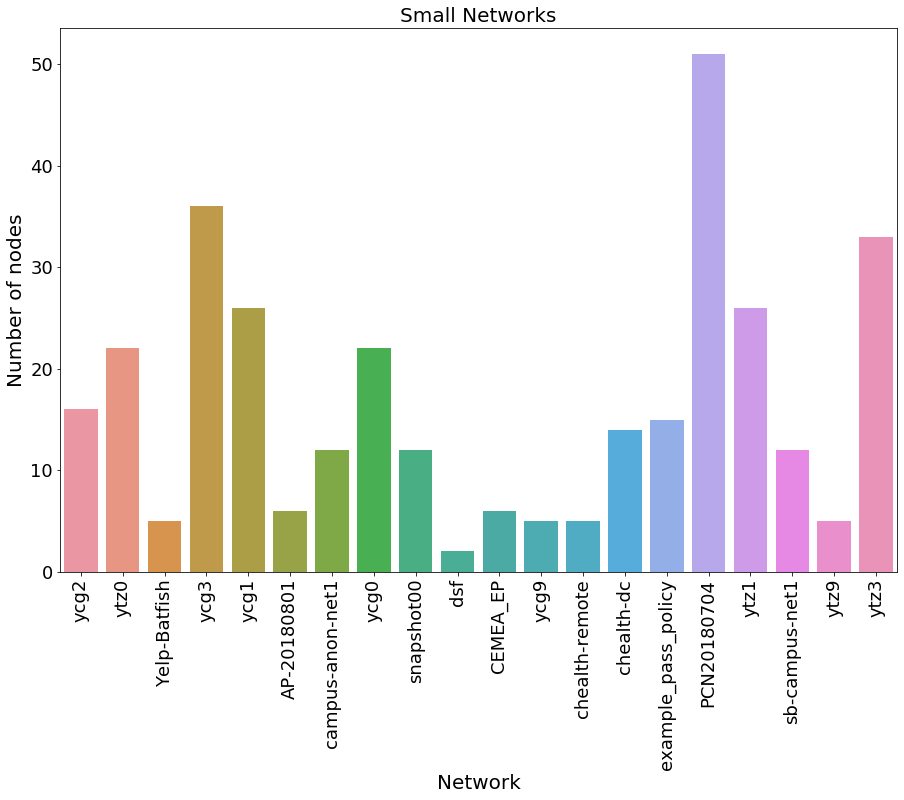

In [12]:
ax = sns.barplot(x="Network", y="Nodes", data=df2)
ax.set_ylabel("Number of nodes")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Small Networks")
plt.savefig("Num_of_nodes_small.png")

In [15]:
directories = [x[1] for x in os.walk(os.getcwd())][0]
time_dict = defaultdict(float)
for directory in directories:
    start = time()
    NETWORK_NAME = directory
    SNAPSHOT_NAME = "example_snapshot"

    SNAPSHOT_PATH = directory

    # Now create the network and initialize the snapshot
    try:
        bf_set_network(NETWORK_NAME)
        bf_init_snapshot(SNAPSHOT_PATH, name=SNAPSHOT_NAME, overwrite=True)
    except:
        print(directory + " not loaded")
        continue
    load_questions()
    data = bfq.namedStructures().answer().frame()
    Structure_types = list(data.Structure_Type.unique())
    for struct in Structure_types:

        df = data[data['Structure_Type']==struct]

        col_names = list(df.Structure_Name.unique())
        unique_nodes = list(df.Node.unique())

        struct_df = pd.DataFrame(index=unique_nodes,columns=col_names)

        nodes = df['Node']
        acls = df['Structure_Name']
        values = df['Structure_Definition']

        zip_data = zip(nodes,acls,values)

        for index,column,value in zip_data:
            struct_df.loc[index,column] = [value]
        
        temp = bfq.edges().answer().frame()
        del temp['IPs']
        del temp["Remote_IPs"]

        def convert(x):
            s = str(x)
            a = s.split(':')
            a[0] = re.sub("\[(.*?)\]","",a[0])
            return a[0]

        temp = temp.applymap(convert)

        G=nx.from_pandas_edgelist(temp, 'Interface','Remote_Interface')
        pr = nx.pagerank(G,alpha = 0.9)
    end = time()
    time_dict[directory] = end - start


status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:47:00.454000-04:00 Parse network configs 10 / 17.
status: ASSIGNED
.... 2019-10-03 17:47:00.454000-04:00 Serializing 16 vendor-independent configuration structures for snapshot 2bb82291-1ac0-4b86-8fae-55eb151be428 16 / 16.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:47:00.454000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 16 / 16.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:47:00.996000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by running:

    bf_upload_diagnostics(dry_run=Fal

SWITCH-Configs2 not loaded


status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:47:04.905000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:47:04.905000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:47:04.905000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:47:04.905000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:47:04.905000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:47:04.905000-04:00 Parse network configs 171 / 1125.
status: CHECKINGSTATUS
.... 2019-10-03 17:47:04.905000-04:00 Parse network configs 523 / 1125.
status: ASSIGNED
.... 2019-10-03 17:47:04.905000-04:00 Parse network configs 900 / 1125.
status: ASSIGNED
.... 2019-10-03 17:47:04.905000-04:00 Serializing 'org.batfish.representation.cisco.CiscoConfiguration' instances to disk 300 / 1093. (00:00:05 elapsed)
status: CHECKINGSTATUS
.... 2019-10-03 17:47:04.905000-04:00 Reading, unpacking, and deserializing files containing 'org.batfish.datamodel.GenericConfigObject' instances 415 / 109

.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task inf

.ipynb_checkpoints not loaded
configs not loaded


status: ASSIGNED
.... 2019-10-03 17:50:47.254000-04:00 Parse network configs 7 / 20.
status: ASSIGNED
.... 2019-10-03 17:50:47.254000-04:00 Parse network configs 20 / 20.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:50:47.254000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 22 / 22.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:50:47.814000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by running:

    bf_upload_diagnostics(dry_run=False, contact_info='<optional email address>')

to share private, anonymized information. For more information, see the documentation with

Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:02.754000-04:00 Begin job.
Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:51:02.958000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:02.958000-04:00 Begin job.
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:03.988000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:04.423000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:51:04.627000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:04.627000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task inf

Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:51:47.325000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:47.325000-04:00 Begin job.
status: BLOCKED
.... no task information
status: ASSIGNED
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:47.763000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:48.063000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:48.237000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:48.427000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:51:48.664000-04:00 Parse network configs 1 / 14.
status: ASSIGNED
.... 2019-10-03 17:51:48.664000-04:00 Parse network configs 10 / 14.
status: ASSIGNE

status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:59.063000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:59.218000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:51:59.982000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:51:59.982000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:51:59.982000-04:00 Parse network configs 50 / 101.
status: ASSIGNED
.... 2019-10-03 17:51:59.982000-04:00 Parse network configs 97 / 101.
status: CHECKINGSTATUS
.... 2019-10-03 17:51:59.982000-04:00 Convert configurations to vendor-independent format 83 / 101.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:51:59.982000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 101 / 101.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 20

confs_rhythmone not loaded


status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:52:28.229000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:52:28.229000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:52:28.229000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:52:28.229000-04:00 Parse network configs 77 / 216.
status: ASSIGNED
.... 2019-10-03 17:52:28.229000-04:00 Parse network configs 186 / 216.
status: CHECKINGSTATUS
.... 2019-10-03 17:52:28.229000-04:00 Serializing 'org.batfish.representation.cisco.CiscoConfiguration' instances to disk 199 / 216.
status: ASSIGNED
.... 2019-10-03 17:52:28.229000-04:00 Serializing 216 vendor-independent configuration structures for snapshot 76e388b5-3dcc-472e-884d-c91b48a8d2c2 216 / 216.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:52:28.229000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 216 / 216.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task informat

.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:52:48.068000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:52:48.365000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:52:48.614000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:52:48.614000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:52:49.156000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: CHECKINGSTATUS
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:52:49.350000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:52:49.733000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:52:49.733000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:52:50.128000-04

.... 2019-10-03 17:53:07.231000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:53:07.643000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:07.643000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:53:08.061000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:08.061000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:53:08.572000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:08.572000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:53:08.985000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:53:08.985000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:08.985000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:53:09.696000-04:00 Parse network configs 

ytz2 not loaded


status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:09.696000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 14 / 14.
Default snapshot is now set to example_snapshot
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:09.969000-04:00 Begin job.
Your snapshot was successfully initialized but Batfish failed to fully recognized some lines in one or more input files. Some unrecognized configuration lines are not uncommon for new networks, and it is often fine to proceed with further analysis. You can help the Batfish developers improve support for your network by running:

    bf_upload_diagnostics(dry_run=False, contact_info='<optional email address>')

to share private, anonymized information. For more information, see the documentation with:

    help(bf_upload_diagnostics)
Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 

rhythmone-aws-configuration-2016-02-16_13-03-56 not loaded


status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:53:14.218000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:53:14.218000-04:00 Parse network configs 40 / 51.
status: ASSIGNED
.... 2019-10-03 17:53:14.218000-04:00 Serializing 51 vendor-independent configuration structures for snapshot cf1d83d8-84ec-4985-ac20-7c38ce55f99a 40 / 51.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:14.218000-04:00 Deserializing objects of type 'org.batfish.datamodel.Configuration' from files 51 / 51.
Default snapshot is now set to example_snapshot
status: ASSIGNED
.... no task information
status: ASSIGNED
.... 2019-10-03 17:53:15.129000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:15.129000-04:00 Begin job.
Successfully loaded 63 questions from remote
status: TRYINGTOASSIGN
.... no task information
status: ASSIGNED
.... 2019-10-03 17:53:15.511000-04:00 Begin job.
status: ASSIGNED
.... 2019-10-03 17:53:15.511000-04:00 Begin job.
status: TERMINATE

status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: BLOCKED
.... no task information
status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:53.767000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no task information
status: CHECKINGSTATUS
.... 2019-10-03 17:53:54.747000-04:00 Begin job.
status: TERMINATEDNORMALLY
.... 2019-10-03 17:53:54.747000-04:00 Begin job.
status: TRYINGTOASSIGN
.... no 

switch-configs not loaded


In [16]:
df = pd.DataFrame(time_dict.items())
times = []
for k,v in num_nodes.items():
    times.append(v)
df["Time required"] = times
df = df.groupby("Time required").agg('mean')
df = df.reset_index()
df.columns = ["Nodes","Time required"]


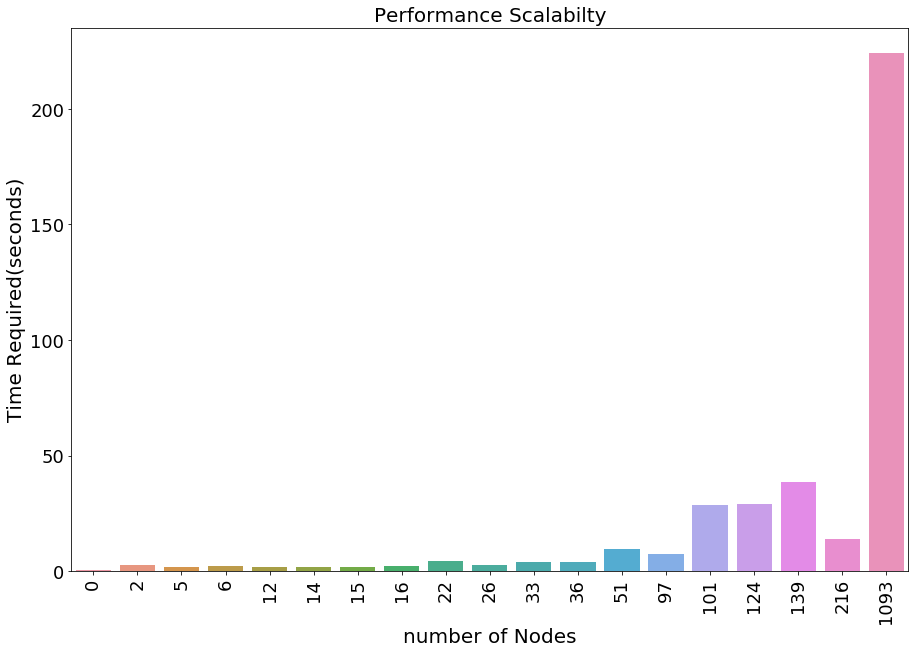

In [17]:
ax = sns.barplot(x="Nodes", y="Time required", data=df)
plt.ylabel("Time Required(seconds)")
plt.xlabel("number of Nodes")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Performance Scalabilty")
plt.savefig("performance_scalability.png")